# Guía 5 - Transformada Z

## Ejercicio 2

Encuentre la respuesta en frecuencia de los sistemas anteriores suponiendo una frecuencia de muestreo de 10kHz. Tenga en cuenta la relación entre la Transformada Z y la Transformada de Fourier

### Solución

Teniendo la $H(z)$ y sabiendo que el espectro de frecuencias (el espectro de magnitudes de la Transformada de Fourier) se encuentra en el circulo unitario $z = e^{j\omega}$ podemos encontrar los valores de la DFT de la respuesta al impulso del sistema (respuesta en frecuencias):
$$
\mathcal(F)\{ h(t) \} = H(z) \quad \text{, } |z| = 1 \Leftrightarrow z = e^{j\omega}
$$

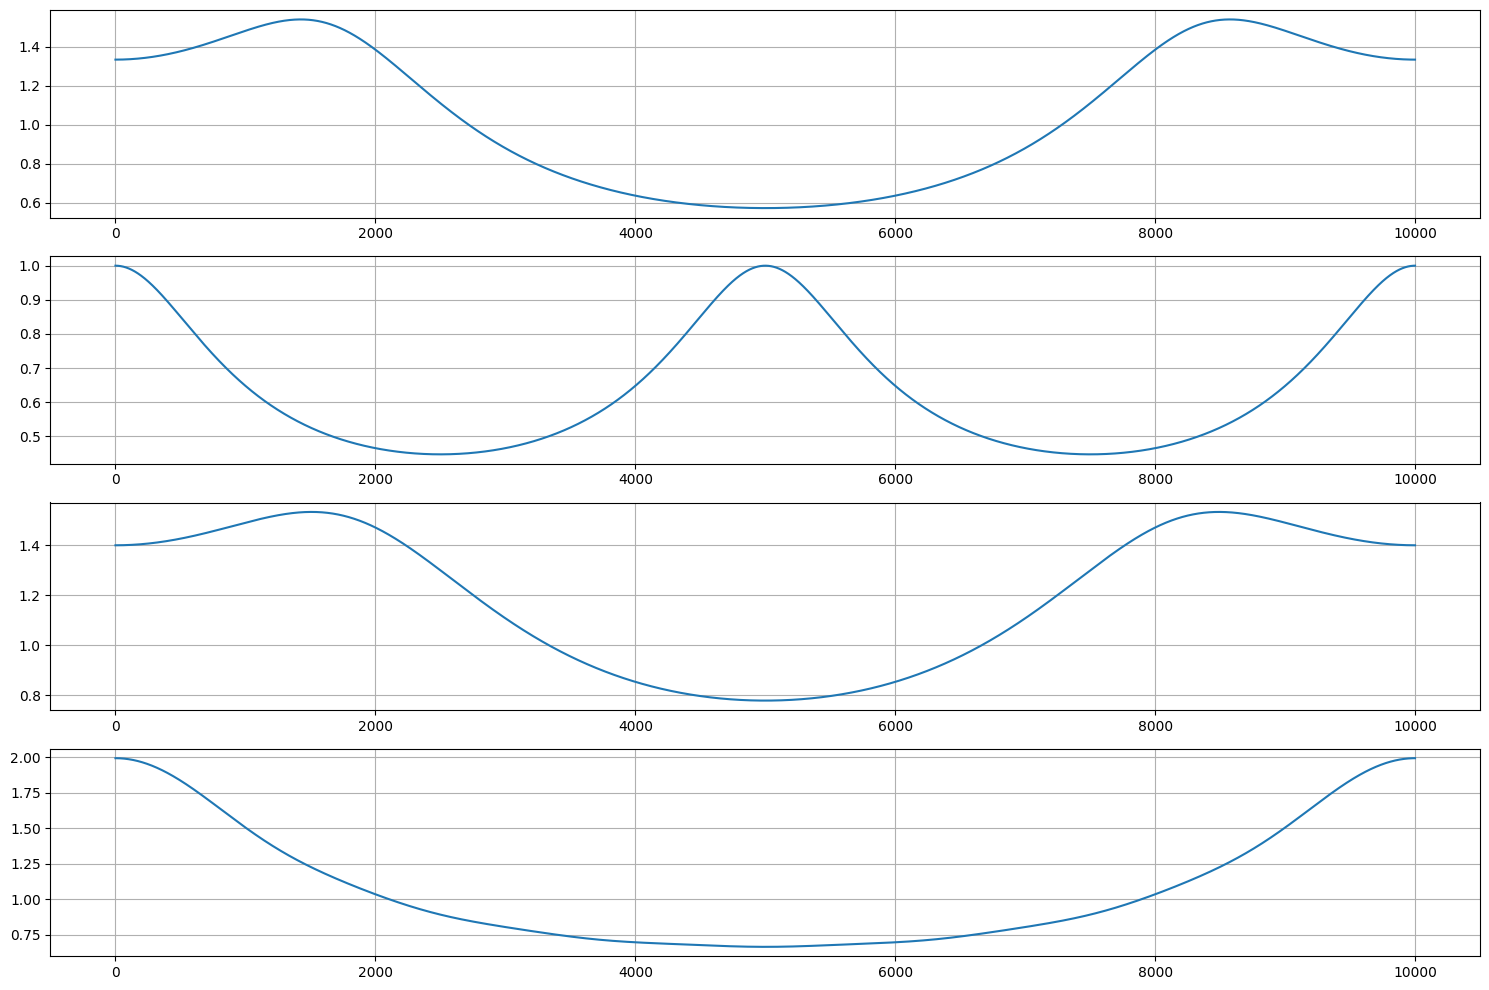

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def evaluarH(Y,X,omega):
    '''
    Dado los coeficientes del numerador y denominador de H(z) y unos angulos omega,
    devuelve los valores de frecuencia
    '''
    H = np.zeros(len(omega), dtype=complex)
    z = [np.exp(1j*om) for om in omega]
    for i in range(len(omega)):
        num = [Y[j]*np.power(z[i],-j) for j in range(len(Y))] # a0 + a1*z^-1 + a2*z^-2 + ...
        den = [X[j]*np.power(z[i],-j) for j in range(len(X))] # b0 + b1*z^-1 + b2*z^-2 + ...
        H[i] = np.sum(num)/np.sum(den)
    return H

# Parametros
fm = 10000

# Respuestas en frecuencia
omega = np.linspace(0,2*np.pi,fm,endpoint=False)
H = [
    evaluarH([1]                                  ,[1,-0.5,0.25],omega),
    evaluarH([0,1]                                ,[1,-1,-1]    ,omega),
    evaluarH([7]                                  ,[1,-2,6]     ,omega),
    evaluarH([1.0/np.power(2,k) for k in range(8)],[1]          ,omega),
]

# Graficar
fig, ax = plt.subplots(4)
fig.set_figheight(10)
fig.set_figwidth(15)
for axi in ax:
    axi.grid()

for i in range(4):
    ax[i].plot(np.abs(H[i]))

fig.tight_layout()

In [2]:
# TODO: hacer graficos 3D con los valores de H(z) en el plano z, para ver masomenos los valores en 3d sobre el circulo unitario